<a href="https://colab.research.google.com/github/Koallla/Data-Science/blob/hw2/Hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bestsellers with categories.csv')
df.head()
df.shape

(550, 7)

О скольки книгах хранит данные датасет? 550 книг

In [4]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Есть ли в каких либо переменных пропуски? Нет

In [5]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Какие есть уникальные жанры? 'Non Fiction', 'Fiction'

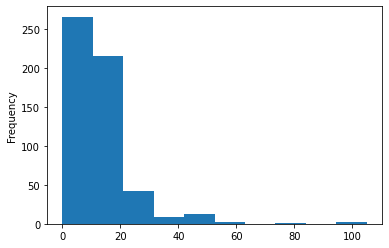

In [6]:
df.price.plot(kind='hist')

In [7]:
df.price.max()
df.price.min()
df.price.mean()
df.price.median()

11.0

Mаксимальная цена? 105
Минимальная цена? 0
Средняя цена? 13.1
Медианная цена? 11.0

In [8]:
df.user_rating.max()

4.9

Какой рейтинг в датасете наивысший? Ответ: 4.9

In [9]:
(df['user_rating'] == df.user_rating.max()).sum()

52

Сколько книг имеют такой рейтинг? Ответ: 52

In [10]:
max_reviews = df.reviews.max()
df[df['reviews'] == max_reviews]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing

In [11]:
max_price_2015 = df[df.year == 2015].price.max()
index = df[df.year == 2015].price.sort_values()[-1:].index
df.iloc[index]

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая (можно использовать промежуточный датафрейм)? Ответ: Publication Manual of the American Psychologic... 

In [12]:
((df.genre == 'Fiction') & (df.year == 2015)).sum()

17

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 17

In [21]:
df_filter = df[df.year.isin([2010, 2011])]
df_filter[df_filter.user_rating == df_filter.user_rating.max()]
# df.name[((df.year==2010) | (df.year==2011)) & (df.user_rating == 4.9)].count()

1


Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах (используйте | или функцию isin)? Ответ: 1

In [14]:
df[df_filter][-1:]

,name,author,user_rating,reviews,price,year,genre
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction





 

Какая книга последняя в отсортированном списке? Ответ: Women Food and God: An Unexpected Path to Almo...

In [136]:
df[df.genre == 'Fiction'].groupby(['price']).max()[-1:]
df[df.genre == 'Fiction'].groupby(['price']).min()[0:1]
df[df.genre == 'Fiction'][['price']].mean()


price    10.85
dtype: float64